In [1]:
# import sys
# sys.path.append('/Users/125715/python/fluidlib')
import math as m
import matplotlib.pyplot as plt
import numpy as np
import conversion_library as c; 
import volume_calc as v
import mat_lib as mat
import thermal_solver as t
# from fluidlib import flow_prop_calc as f
import gc


REFPROP not found, defaulting to CoolProp


In [3]:
print(type(eval("False")))

<class 'bool'>


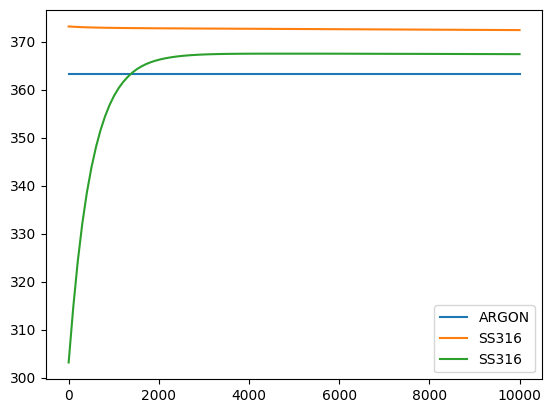

In [2]:
node1 = t.Node(
    T = 273.15+90,
    Pressure= c.psi2pa(115),
    medium="ARGON",
    medium_type="FLUID",
    isothermal=True
)
node2 = t.Node(
    T = 273.15 + 100,
    Pressure= 101325,
    medium="SS316",
    medium_type="SOLID",
    isothermal=False
)
node3 = t.Node(
    T=273.15+30,
    medium="SS316",
    medium_type="SOLID",
    V=v.cylinder(c.inch2m(0.75), 1) - v.cylinder(c.inch2m(0.75-2*.065), 1)
)
a = t.Path(
    nodeA = node1,
    nodeB = node3,
    Area=m.pi/4*c.inch2m(0.75-2*.065)*1,
    h= 25,

)
b = t.Path(
    nodeA=node2,
    nodeB=node3,
    Area=m.pi/4*c.inch2m(0.75)*1,
    h= 4.6
)
nodes = [node1, node2,node3]
paths = [a,b]
t_span = [0,1e4
          ]
t_eval = np.linspace(t_span[0], t_span[1], 100)

y = t.T_vs_t(
    t_span,
    t_eval,
    paths,
    nodes
)
plt.plot(y.t, y.y[0])
plt.plot(y.t, y.y[1])
plt.plot(y.t, y.y[2])

plt.legend([node1.medium, node2.medium,node3.medium])

In [3]:
#q = hA(T1-T2)
print(a.h * a.Aconv * (y.y[2][-1] - y.y[0][-1]),
    a.Aconv,
    a.h,
    y.y[2][-1],
    y.y[0][-1]
)

AttributeError: 'Path' object has no attribute 'Aconv'

In [ ]:
print(b.h * b.Aconv * (y.y[2][-1] - y.y[1][-1]),
    b.Aconv,
    b.h,y.y[2][-1],
    y.y[1][-1]
)

In [ ]:
b.h * b.Aconv / (a.h * a.Aconv)

In [ ]:
(y.y[2][0] - y.y[1][0]) / (y.y[2][0] - y.y[0][0])

In [ ]:
print(a.Acond,
    b.Acond,
    a.Arad,
    b.Arad)

In [ ]:
m.pi/4*0.62**2

In [ ]:
v.cylinder(1,65.37)
Dh = c.inch2m(5.5)
print(Dh)
A = c.si2sm(.44)
print(A)
c.pa2psi(.175)

In [ ]:
VredTee = c.cmm2cin(833070.56)
VFlange = c.cmm2cin(34587.71)
print(VFlange)
V_cylinder = v.cylinder(1, 86.59)
print(str(V_cylinder) + " cu-in")
print(2*c.cmm2cin(34587.11))
print(V_cylinder + 4.22 + (3*2.06))
c.cintocm(57.83)*1000

In [ ]:
V_pipe = v.cylinder(1, 64.42)
V_Flange = v.cylinder(1.05, 2.438)*2 +2.32
V_tee = 3.54
V_elbow = 2.06*2
VTotal = V_pipe + V_Flange + V_tee + V_elbow
c.cintocm(VTotal)*1000



In [ ]:
cp=float(c.getFluidProperty(hOut='CPMASS', hIn='TD', val1=273, val2=.082, hFLd='HYDROGEN'))
cv=c.getFluidProperty(hOut='CVMASS', hIn='TD', val1=273, val2=.082, hFLd='HYDROGEN')
M = c.getFluidProperty(hOut='MOLARMASS', hIn='TD', val1=273, val2 = 0.082, hFLd='HYDROGEN')
print(M)
print(cp)


In [ ]:
E = mat.getMatProp(mat.SS316, "E")*1e9
print(c.pa2psi(E))
k = mat.getMatProp(mat.SS316, "k")
print(k)
print(c.inch2m(6.25))
print(c.getFluidProperty(hOut= 'V', hIn='TD', val1= 375, val2= 0.082, hFLd='HYDROGEN'))
print(c.si2sm(76.404))

In [ ]:
Tm_i = (273+508)/2
x = np.linspace(0,.5, 1000)
D=c.inch2m(.402)
qFlux = 59102 #W/m^2
P= m.pi*D
mdot = .0004 #kg/s
Tmx = Tm_i + qFlux*P/(mdot*14196)*x
plt.plot(x, Tmx)
